In [84]:
%matplotlib inline

import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,stats
import itczmip.load as imload
import itczmip.compute as imcompute
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec


### Define where to save figures

In [3]:
fig_dir = 'figures'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

### Calculate additional q-flux from protocol

In [4]:
def calc_qflux(lat, A, delPhi):
    """ computed idealized ITCZ q-flux forcing
    lat must be in radians, A is in W/m2, change in latitude delPhi is in radians """
    q = np.zeros(len(lat))

    B = (
        A * np.cos(delPhi)
        / (2 * (1 - np.sin(2 * delPhi)) * (delPhi / np.pi - np.pi / (4 * delPhi)))
    )

    q[abs(lat) > 2 * delPhi] = B
    q[abs(lat) < delPhi] = A * np.cos(lat[abs(lat) < delPhi] * np.pi / (2 * delPhi))

    return q


### Fig. 1: Plot additional q-flux from protocol

In [5]:
A_colors = ["#c93c53","#c6c6c6"]

delPhi = np.pi / 36
phi = np.arange(-np.pi / 2, np.pi / 2, 0.001)  # [lat in rad]
r_earth = 6.314e6


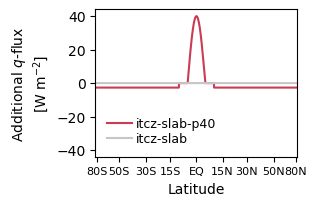

In [6]:
# calculate idealized q_itcz following Eqs. 3 and 4 of ITCZMIP protocol
A_list = [40, 0]  # [W m^-2]
A_labels = [
    "itcz-slab-p40",
    "itcz-slab",
]
A_colors = ["#c93c53","#c6c6c6"]

delPhi = np.pi / 36
phi = np.arange(-np.pi / 2, np.pi / 2, 0.001)  # [lat in rad]
r_earth = 6.314e6

q_itcz = np.zeros((len(A_list), len(phi)))
OHT_itcz = np.zeros((len(A_list), len(phi)))
for a, A in enumerate(A_list):
    q_itcz[a, :] = calc_qflux(phi, A, delPhi)

    for i in range(1, len(phi)):
        OHT_itcz[a, i] = (
            -2 * np.pi * r_earth ** 2
            * integrate.simps(np.cos(phi[: i + 1]) * q_itcz[a, :i+1], x=phi[:i+1])
        )

# plot idealized q_itcz
xticks = np.array([-80, -50, -30, -15, 0, 15, 30, 50, 80])
xticklabels = ["80S", "50S", "30S", "15S", "EQ", "15N", "30N", "50N", "80N"]

cm = 1/2.54  # centimeters to inches
plt.figure(figsize=(8.3*cm, 5.5*cm))
plt.subplot(111)

plt.plot(np.sin(phi), q_itcz[0, :], label=A_labels[0],color=A_colors[0])
plt.plot(np.sin(phi), q_itcz[1, :], label=A_labels[1],color=A_colors[1])

    
plt.xticks(np.sin(np.deg2rad(xticks)), xticklabels, fontsize=8)
plt.xlim([-1, 1])
plt.xlabel("Latitude")
plt.ylabel("Additional $q$-flux \n[W m$^{-2}]$")
plt.legend(fontsize=9, frameon=False, handletextpad=0.3, labelspacing=0.2)
plt.ylim([-44,44])


plt.tight_layout()

#plt.savefig(os.path.join(fig_dir, "fig01.eps"))

### Fig. 2: Slab SST and SST difference from control


In [7]:
experiment_list = [
    "itcz-SST",
    "itcz-slab",
    "itcz-slab-m40",
    "itcz-slab-m20",
    "itcz-slab-p20",
    "itcz-slab-p40",
    "itcz-slab-4xCO2",
    "itcz-slab-4xCO2-m40",
    "itcz-slab-4xCO2-m20",
    "itcz-slab-4xCO2-p20",
    "itcz-slab-4xCO2-p40",
]

exp_ctl_list = experiment_list[1:6]
exp_4xCO2_list = experiment_list[6:11]
exp_pert_list = [x + '-4xCO2response' for x in exp_ctl_list]

# definition of experiments that make up "control" and "response"
exp_plot_lists = {
    "control": exp_ctl_list,
    "response": exp_pert_list,
}

data = {}
data["CESM2"] = imload.load_data("CESM2", experiment_list)

/Users/agp93/Documents/github/width-itcz-mip/itczmip/load.py:23: UserWarning: rename 'lat' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_exp = data_exp.rename(dim_dict[model])


In [8]:
myorder=[1,2,0,3,4]
my_exp_ctl_list=[exp_ctl_list[i] for i in myorder]
my_exp_pert_list=[exp_pert_list[i] for i in myorder]
my_exp_plot_lists = {
    "control": my_exp_ctl_list,
    "response": my_exp_pert_list,    
}

In [9]:
# define dictionary to account for different variable names in different models
vn = imload.define_variable_names()

for model in ["CESM2"]: #model_list:
    for exp, ds in data[model].items():
        imcompute.calc_derived_vars(model, ds)
        imcompute.calc_surf_TOA_fluxes(model, ds)

In [10]:
A_labels = [
    "itcz-slab-m40",
    "itcz-slab-m20",
    "itcz-slab-p20",
    "itcz-slab-p40",
    "itcz-slab",
]

A_colors = ["#3a38c2","#8e7dc6","#cf878a","#c93c53","#c6c6c6"]



In [11]:
disp_labels = [
    "m40",
    "m20",
    "p20",
    "p40",
    "ctl",
]


In [12]:
if "_lline" in A_labels:
    A_labels.index("_lline")

In [104]:
# define dictionary to account for different variable names in different models
vn = imload.define_variable_names()



In [9]:
A_labels = [
    "itcz-slab-m40",
    "itcz-slab-m20",
    "itcz-slab-p20",
    "itcz-slab-p40",
    "itcz-slab",
]

A_colors = ["#3a38c2","#8e7dc6","#cf878a","#c93c53","#c6c6c6"]



In [10]:
disp_labels = [
    "m40",
    "m20",
    "p20",
    "p40",
    "ctl",
]


In [11]:
if "_lline" in A_labels:
    A_labels.index("_lline")

In [105]:
comparison_list = "eqt_heating_ctl"

exp_plot_ctl = "itcz-slab"
#exp_plot_pert_list = [exp_ctl_list[i] for i in [0,1,3,4]]

plot_xlim = 90





In [106]:
    data_ctl = ctl_data
    
    plot_gm=False
    plot_xlim=plot_xlim
    unit_conv=1.0
    unit_name=""

# Plot Q-fluxes and SSTs from itcz-slab for each model to make Fig S1.

In [85]:
model_list = ["GFDL-AM2", "CESM1", "CESM2", "Isca"]

thismodel = "GFDL-AM2"

data = {}
data[thismodel] = imload.load_data(thismodel, experiment_list)

/Users/agp93/Documents/github/width-itcz-mip/itczmip/load.py:23: UserWarning: rename 'lat' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_exp = data_exp.rename(dim_dict[model])


In [86]:
# define dictionary to account for different variable names in different models
vn = imload.define_variable_names()

for model in [thismodel]: #model_list:
    for exp, ds in data[model].items():
        imcompute.calc_derived_vars(model, ds)
        imcompute.calc_surf_TOA_fluxes(model, ds)

model = thismodel
ctl_data = data[model][exp_plot_ctl]


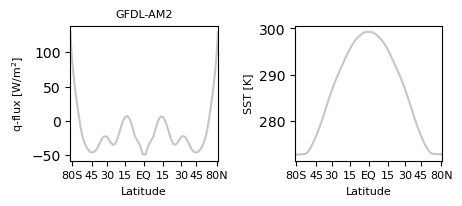

In [87]:
    data_ctl = ctl_data
    
    plot_gm=False
    plot_xlim=plot_xlim
    unit_conv=1.0
    unit_name=""

    #def data_and_delta(data_ctl, data_pert, variable, unit_conv=1.0, unit_name="", plot_xlim=90, plot_gm=True):
    """ Plot line plot of climatologies and differences from data_ctl
    
    Inputs
    ------
    data_ctl: xarray dataset for control experiment data
    data_pert: list of xarray datasets with all perturbation experiments
    variable: string (variable to plot)
    """
    lat_ind = np.abs(data_ctl.lat.values) <= plot_xlim + 2
    sin_lat = np.sin(np.deg2rad(data_ctl.lat.values[lat_ind]))
    if plot_xlim == 90:
        plot_xticks = [-80, -45, -30, -15, 0, 15, 30, 45, 80]
        plot_xtick_labels = ["80S", "45", "30", "15", "EQ", "15", "30", "45", "80N"]
        #plot_xticks = [-60, -30, -15, 0, 15, 30, 60]
        #plot_xtick_labels = ["60S", "30", "15", "EQ", "15", "3-", "60N"]
    elif plot_xlim == 30:
        plot_xticks = range(-30, 31, 10)
        plot_xtick_labels = ["30S", "20S", "10S", "EQ", "10N", "20N", "30N"]
    elif plot_xlim == 20:
        #plot_xticks = range(-20, 21, 5)
        plot_xtick_labels = ["20S", "15S", "10S", "5S", "EQ", "5N", "10N", "15N", "20N"]
        plot_xticks = range(-20, 21, 10)
        plot_xtick_labels = ["-20","-10", "EQ", "10", "20"]

        
    cm = 1/2.54  # centimeters in inches
    fig = plt.figure(figsize=(12*cm, 5.5*cm))

    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    ax_list = [ax1, ax2]
    
    
    variable = "flux_oh"
    var_plot = vn[model].get(variable)
    if var_plot is None:
        var_plot = variable
    variable = var_plot


    if unit_name == "":
        unit_name = data_ctl[variable].units



    #for data in data_pert:
    ax1.plot(sin_lat, data_ctl[variable].values[lat_ind] * unit_conv, label=data_ctl.case
    )   
    ax1.set_ylabel(variable + " [" + unit_name + "]",fontsize=8)
    ax1.legend(fontsize=8, labelspacing=0.15, frameon=False)
    ax1.set_xlim(np.sin(np.deg2rad([-plot_xlim, plot_xlim])))
    ax1.set_xticks(np.sin(np.deg2rad(plot_xticks)))
    ax1.set_xticklabels(plot_xtick_labels,fontsize=8)
    ax1.set_xlabel("Latitude",fontsize=8)

    ax1.set_title(thismodel,fontsize=8)

    
    
    
    variable = "t_surf"
    var_plot = vn[model].get(variable)
    if var_plot is None:
        var_plot = variable
    variable = var_plot


    if unit_name == "":
        unit_name = data_ctl[variable].units



    ax2.plot(sin_lat, data_ctl[variable].values[lat_ind] * unit_conv, label=data_ctl.case)

    ax2.set_xlim(np.sin(np.deg2rad([-plot_xlim, plot_xlim])))
    ax2.set_xticks(np.sin(np.deg2rad(plot_xticks)))
    ax2.set_xticklabels(plot_xtick_labels,fontsize=8)
    ax2.set_xlabel("Latitude",fontsize=8)
    ax2.legend(fontsize=8, labelspacing=0.15, frameon=False)


    #plt.tight_layout(rect=(0, 0, 1, 0.95))

    #return ax_list
    axes = ax_list
    
    #axes[0].set_ylabel("Precipitation [mm day$^{-1}$]",fontsize=8)

    axes[0].legend(fontsize=8, frameon=False)
    axes[1].legend().set_visible(False)
    axes[0].legend().set_visible(False)


    plt.tight_layout()


    #plt.tight_layout(rect=(0, 0, 1, 0.95))

    #return ax_list
    axes = ax_list
    
    #axes[0].set_ylabel("Precipitation [mm day$^{-1}$]",fontsize=8)

    for ax in axes[:]:
        for line in ax.lines:
            lab = line.get_label()
            if lab in A_labels:
                line.set_color(A_colors[A_labels.index(lab)])

    axes[0].legend(fontsize=8, frameon=False)
    axes[0].legend().set_visible(False)

    
    axes[0].set_ylabel("q-flux [W/m$^2$]",fontsize=8)

    axes[1].set_ylabel("SST [K]",fontsize=8)

    

    plt.tight_layout()

    
    plt.savefig(os.path.join(fig_dir, "gfdl-qflux.eps"))

In [88]:
model_list = ["GFDL-AM2", "CESM1", "CESM2", "Isca"]

thismodel = "CESM1"

data = {}
data[thismodel] = imload.load_data(thismodel, experiment_list)

/Users/agp93/Documents/github/width-itcz-mip/itczmip/load.py:23: UserWarning: rename 'lat' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  data_exp = data_exp.rename(dim_dict[model])


In [34]:
# define dictionary to account for different variable names in different models
vn = imload.define_variable_names()

for model in [thismodel]: #model_list:
    for exp, ds in data[model].items():
        imcompute.calc_derived_vars(model, ds)
        imcompute.calc_surf_TOA_fluxes(model, ds)

model = thismodel
ctl_data = data[model][exp_plot_ctl]


In [36]:
ds2 = xr.open_dataset("./data/CESM1/ctl-slab-qflux.nc")


In [43]:
ds2

<xarray.Dataset>
Dimensions:  (time: 1, lon: 144, lat: 90)
Coordinates:
  * time     (time) object 2002-01-01 00:00:00
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
Data variables:
    flux_oh  (time, lat, lon) float32 ...

In [40]:
ds3 = xr.open_dataset("./data/CESM1/ctl-slab-sst.nc")


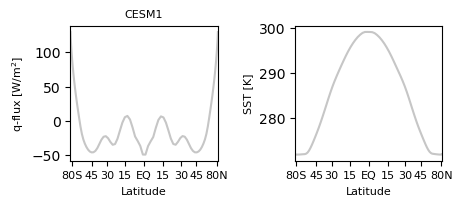

In [79]:
    data_ctl = ctl_data
    
    plot_gm=False
    plot_xlim=plot_xlim
    unit_conv=1.0
    unit_name=""

    #def data_and_delta(data_ctl, data_pert, variable, unit_conv=1.0, unit_name="", plot_xlim=90, plot_gm=True):
    """ Plot line plot of climatologies and differences from data_ctl
    
    Inputs
    ------
    data_ctl: xarray dataset for control experiment data
    data_pert: list of xarray datasets with all perturbation experiments
    variable: string (variable to plot)
    """
    lat_ind = np.abs(data_ctl.lat.values) <= plot_xlim + 2
    sin_lat = np.sin(np.deg2rad(data_ctl.lat.values[lat_ind]))
    plot_xticks = [-80, -45, -30, -15, 0, 15, 30, 45, 80]
    plot_xtick_labels = ["80S", "45", "30", "15", "EQ", "15", "30", "45", "80N"]
    #plot_xticks = [-60, -30, -15, 0, 15, 30, 60]
    #plot_xtick_labels = ["60S", "30", "15", "EQ", "15", "3-", "60N"]

    #sin_lat = np.sin(np.deg2rad(data_ctl.lat.values[lat_ind]))

        
    cm = 1/2.54  # centimeters in inches
    fig = plt.figure(figsize=(12*cm, 5.5*cm))

    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    ax_list = [ax1, ax2]
    
    
    variable = "flux_oh"
    unit_name = "W/m2"

    #for data in data_pert:
    ax1.plot(np.sin(np.deg2rad(ds2.lat)), ds2[variable].mean("lon").mean("time"), label=data_ctl.case
    )   
    ax1.set_ylabel(variable + " [" + unit_name + "]",fontsize=8)
    ax1.legend(fontsize=8, labelspacing=0.15, frameon=False)
    ax1.set_xlim(np.sin(np.deg2rad([-plot_xlim, plot_xlim])))
    ax1.set_xticks(np.sin(np.deg2rad(plot_xticks)))
    ax1.set_xticklabels(plot_xtick_labels,fontsize=8)
    ax1.set_xlabel("Latitude",fontsize=8)

    ax1.set_title(thismodel,fontsize=8)

    
    
    
    variable = "TS"
    var_plot = vn[model].get(variable)
    if var_plot is None:
        var_plot = variable
    variable = var_plot


    if unit_name == "":
        unit_name = data_ctl[variable].units

    lat_ind = np.abs(data_ctl.lat.values) <= plot_xlim + 2
    sin_lat = np.sin(np.deg2rad(data_ctl.lat.values[lat_ind]))

    ax2.plot(sin_lat, data_ctl[variable].values[lat_ind] * unit_conv, label=data_ctl.case)

    ax2.set_xlim(np.sin(np.deg2rad([-plot_xlim, plot_xlim])))
    ax2.set_xticks(np.sin(np.deg2rad(plot_xticks)))
    ax2.set_xticklabels(plot_xtick_labels,fontsize=8)
    ax2.set_xlabel("Latitude",fontsize=8)
    ax2.legend(fontsize=8, labelspacing=0.15, frameon=False)


    #plt.tight_layout(rect=(0, 0, 1, 0.95))

    #return ax_list
    axes = ax_list
    
    #axes[0].set_ylabel("Precipitation [mm day$^{-1}$]",fontsize=8)

    axes[0].legend(fontsize=8, frameon=False)
    axes[1].legend().set_visible(False)
    axes[0].legend().set_visible(False)


    plt.tight_layout()


    #plt.tight_layout(rect=(0, 0, 1, 0.95))

    #return ax_list
    axes = ax_list
    
    #axes[0].set_ylabel("Precipitation [mm day$^{-1}$]",fontsize=8)

    for ax in axes[:]:
        for line in ax.lines:
            lab = line.get_label()
            if lab in A_labels:
                line.set_color(A_colors[A_labels.index(lab)])

    axes[0].legend(fontsize=8, frameon=False)
    axes[0].legend().set_visible(False)

    
    axes[0].set_ylabel("q-flux [W/m$^2$]",fontsize=8)

    axes[1].set_ylabel("SST [K]",fontsize=8)

    

    plt.tight_layout()

    
    plt.savefig(os.path.join(fig_dir, "cesm1-qflux.eps"))

In [89]:
ds2 = xr.open_dataset("data/CESM2/qflux-uniform.nc")

In [97]:
model_list = ["GFDL-AM2", "CESM1", "CESM2", "Isca"]

thismodel = "CESM2"

data = {}
data[thismodel] = imload.load_data(thismodel, experiment_list)

In [98]:
# define dictionary to account for different variable names in different models
vn = imload.define_variable_names()

for model in [thismodel]: #model_list:
    for exp, ds in data[model].items():
        imcompute.calc_derived_vars(model, ds)
        imcompute.calc_surf_TOA_fluxes(model, ds)

model = thismodel
ctl_data = data[model][exp_plot_ctl]


In [99]:


comparison_list = "eqt_heating_ctl"
model = "CESM2"
variable = "TS"

exp_plot_ctl = "itcz-slab"
#exp_plot_pert_list = [exp_ctl_list[i] for i in [0,1,3,4]]
exp_plot_pert_list = ["itcz-slab-m40","itcz-slab-m20","itcz-slab-p20","itcz-slab-p40"]

plot_xlim = 90

ctl_data = data[model][exp_plot_ctl]
pert_data = [data[model][x] for x in exp_plot_pert_list]

var_plot = vn[model].get(variable)
if var_plot is None:
    var_plot = variable



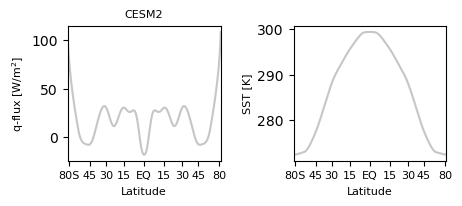

In [100]:
    data_ctl = ctl_data
    data_pert = pert_data
    variable = var_plot
    plot_gm=False
    plot_xlim=plot_xlim
    unit_conv=1.0
    unit_name=""

    #def data_and_delta(data_ctl, data_pert, variable, unit_conv=1.0, unit_name="", plot_xlim=90, plot_gm=True):
    """ Plot line plot of climatologies and differences from data_ctl
    
    Inputs
    ------
    data_ctl: xarray dataset for control experiment data
    data_pert: list of xarray datasets with all perturbation experiments
    variable: string (variable to plot)
    """
    lat_ind = np.abs(data_ctl.lat.values) <= plot_xlim + 2
    sin_lat = np.sin(np.deg2rad(data_ctl.lat.values[lat_ind]))
    if plot_xlim == 90:
        plot_xticks = [-80, -45, -30, -15, 0, 15, 30, 45, 80]
        plot_xtick_labels = ["80S", "45", "30", "15", "EQ", "15", "30", "45", "80"]
    elif plot_xlim == 30:
        plot_xticks = range(-30, 31, 10)
        plot_xtick_labels = ["30S", "20S", "10S", "EQ", "10N", "20N", "30N"]
    elif plot_xlim == 20:
        #plot_xticks = range(-20, 21, 5)
        plot_xtick_labels = ["20S", "15S", "10S", "5S", "EQ", "5N", "10N", "15N", "20N"]
        plot_xticks = range(-20, 21, 10)
        plot_xtick_labels = ["-20","-10", "EQ", "10", "20"]


    if unit_name == "":
        unit_name = data_ctl[variable].units

    cm = 1/2.54  # centimeters in inches
    fig = plt.figure(figsize=(12*cm, 5.5*cm))
    #fig = plt.figure(figsize=(7.5, 3.2))
    #plt.suptitle(data_ctl.model)
    
    # gs = gridspec.GridSpec(1, 2)
    # ax1 = fig.add_subplot(gs[0])
    # ax2 = fig.add_subplot(gs[1])
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    ax_list = [ax1, ax2]

    #for data in data_pert:
    ax1.plot(sin_lat, -ds2.qdp.mean("time").mean("lon"), label=data_ctl.case
    )   
    ax1.set_ylabel(variable + " [" + unit_name + "]",fontsize=8)
    ax1.legend(fontsize=8, labelspacing=0.15, frameon=False)
    ax1.set_xlim(np.sin(np.deg2rad([-plot_xlim, plot_xlim])))
    ax1.set_xticks(np.sin(np.deg2rad(plot_xticks)))
    ax1.set_xticklabels(plot_xtick_labels,fontsize=8)
    ax1.set_xlabel("Latitude",fontsize=8)

 

    #plt.tight_layout(rect=(0, 0, 1, 0.95))

    #return ax_list
    axes = ax_list
    
    #axes[0].set_ylabel("Precipitation [mm day$^{-1}$]",fontsize=8)

    for ax in axes[:]:
        for line in ax.lines:
            lab = line.get_label()
            if lab in A_labels:
                line.set_color(A_colors[A_labels.index(lab)])

    axes[0].legend(fontsize=8, frameon=False)
    axes[0].legend().set_visible(False)

    
    
    variable = "TS"
    var_plot = vn[model].get(variable)
    if var_plot is None:
        var_plot = variable
    variable = var_plot


    if unit_name == "":
        unit_name = data_ctl[variable].units

    lat_ind = np.abs(data_ctl.lat.values) <= plot_xlim + 2
    sin_lat = np.sin(np.deg2rad(data_ctl.lat.values[lat_ind]))

    ax2.plot(sin_lat, data_ctl[variable].values[lat_ind] * unit_conv, label=data_ctl.case)

    ax2.set_xlim(np.sin(np.deg2rad([-plot_xlim, plot_xlim])))
    ax2.set_xticks(np.sin(np.deg2rad(plot_xticks)))
    ax2.set_xticklabels(plot_xtick_labels,fontsize=8)
    ax2.set_xlabel("Latitude",fontsize=8)
    ax2.legend(fontsize=8, labelspacing=0.15, frameon=False)


    #plt.tight_layout(rect=(0, 0, 1, 0.95))

    #return ax_list
    axes = ax_list
    
    #axes[0].set_ylabel("Precipitation [mm day$^{-1}$]",fontsize=8)

    ax1.set_title(thismodel,fontsize=8)

    
    axes[0].legend(fontsize=8, frameon=False)
    axes[1].legend().set_visible(False)
    axes[0].legend().set_visible(False)


    plt.tight_layout()


    #plt.tight_layout(rect=(0, 0, 1, 0.95))

    #return ax_list
    axes = ax_list
    
    #axes[0].set_ylabel("Precipitation [mm day$^{-1}$]",fontsize=8)

    for ax in axes[:]:
        for line in ax.lines:
            lab = line.get_label()
            if lab in A_labels:
                line.set_color(A_colors[A_labels.index(lab)])

    axes[0].legend(fontsize=8, frameon=False)
    axes[0].legend().set_visible(False)

    
    axes[0].set_ylabel("q-flux [W/m$^2$]",fontsize=8)

    axes[1].set_ylabel("SST [K]",fontsize=8)

    

    plt.tight_layout()

    
    
    
    

    plt.tight_layout()

    
    plt.savefig(os.path.join(fig_dir, "cesm2-qflux.eps"))

In [101]:
ds2

<xarray.Dataset>
Dimensions:  (time: 12, lat: 192, lon: 288)
Coordinates:
  * time     (time) object 0001-01-15 00:00:00 ... 0001-12-16 00:00:00
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    S        (time, lat, lon) float32 ...
    T        (time, lat, lon) float32 ...
    U        (time, lat, lon) float32 ...
    V        (time, lat, lon) float32 ...
    area     (lat, lon) float64 ...
    dhdx     (time, lat, lon) float32 ...
    dhdy     (time, lat, lon) float32 ...
    hblt     (time, lat, lon) float32 ...
    mask     (lat, lon) float32 ...
    xc       (lon) float64 ...
    yc       (lat) float64 ...
    qdp      (time, lat, lon) float32 -108.0 -108.0 -108.0 ... -108.0 -108.0
Attributes:
    created:               Fri May 31 11:57:19 MDT 2019
    SST_init_file:         /glade/scratch/apgrass/archive/itcz-SST/atm/hist/i...
    source_template_file:  /glade/u/home/benedict/ys/datain/templates/som.for...
    from_script:           /glade/u/home/apgrass/cesm/itczmip/make_SOM_bc_for...
    author:                Angeline Pendergrass (apgrass@ucar.edu)
    title:                 aqua-planet SOM forcing: QzaFix_h10Fix_TspunFix on...

In [102]:
dsm40 = xr.open_dataset("data/CESM2/qflx_globalflat_m40-ctl.nc")
dsp40 = xr.open_dataset("data/CESM2/qflx_globalflat_p40-ctl.nc")

Text(0, 0.5, 'q-flux w/m2 CESM2')

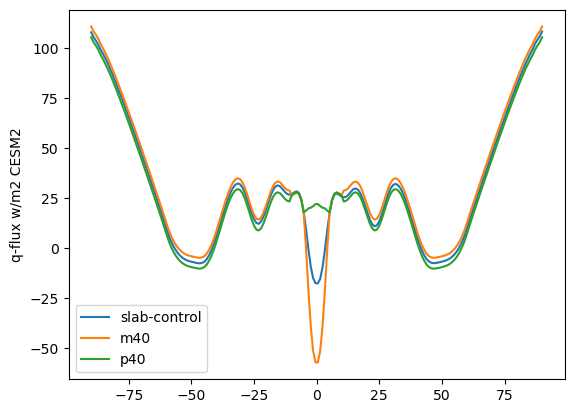

In [103]:
plt.plot(ds3.lat,-ds3.qdp.mean("time").mean("lon"),label="slab-control")
plt.plot(ds3.lat,-dsm40.qdp.mean("time").mean("lon"),label="m40")
plt.plot(ds3.lat,-dsp40.qdp.mean("time").mean("lon"),label="p40")
plt.legend()
plt.ylabel("q-flux w/m2 CESM2")

In [91]:
model_list = ["GFDL-AM2", "CESM1", "CESM2", "Isca"]

thismodel = "Isca"

data = {}
data[thismodel] = imload.load_data(thismodel, experiment_list)

In [92]:
# define dictionary to account for different variable names in different models
vn = imload.define_variable_names()

for model in [thismodel]: #model_list:
    for exp, ds in data[model].items():
        imcompute.calc_derived_vars(model, ds)
        imcompute.calc_surf_TOA_fluxes(model, ds)

model = thismodel
ctl_data = data[model][exp_plot_ctl]


In [93]:
ds5 = xr.open_dataset("data/Isca/itcz_mip_q_flux.nc")

In [94]:
## same thing, opposite sign
#plt.plot(ds5.lat,-ds5.f.mean("lon"))
#plt.plot(ds5.lat,ds5.q_flux_slab.mean("lon"))

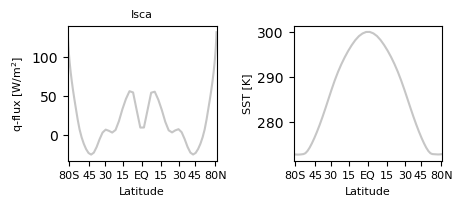

In [95]:
    data_ctl = ctl_data
    
    plot_gm=False
    plot_xlim=plot_xlim
    unit_conv=1.0
    unit_name=""

    #def data_and_delta(data_ctl, data_pert, variable, unit_conv=1.0, unit_name="", plot_xlim=90, plot_gm=True):
    """ Plot line plot of climatologies and differences from data_ctl
    
    Inputs
    ------
    data_ctl: xarray dataset for control experiment data
    data_pert: list of xarray datasets with all perturbation experiments
    variable: string (variable to plot)
    """
    lat_ind = np.abs(data_ctl.lat.values) <= plot_xlim + 2
    sin_lat = np.sin(np.deg2rad(data_ctl.lat.values[lat_ind]))
    if plot_xlim == 90:
        plot_xticks = [-80, -45, -30, -15, 0, 15, 30, 45, 80]
        plot_xtick_labels = ["80S", "45", "30", "15", "EQ", "15", "30", "45", "80N"]
        #plot_xticks = [-60, -30, -15, 0, 15, 30, 60]
        #plot_xtick_labels = ["60S", "30", "15", "EQ", "15", "3-", "60N"]
    elif plot_xlim == 30:
        plot_xticks = range(-30, 31, 10)
        plot_xtick_labels = ["30S", "20S", "10S", "EQ", "10N", "20N", "30N"]
    elif plot_xlim == 20:
        #plot_xticks = range(-20, 21, 5)
        plot_xtick_labels = ["20S", "15S", "10S", "5S", "EQ", "5N", "10N", "15N", "20N"]
        plot_xticks = range(-20, 21, 10)
        plot_xtick_labels = ["-20","-10", "EQ", "10", "20"]

        
    cm = 1/2.54  # centimeters in inches
    fig = plt.figure(figsize=(12*cm, 5.5*cm))

    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    ax_list = [ax1, ax2]
    
    
    variable = "ts"
    var_plot = vn[model].get(variable)
    if var_plot is None:
        var_plot = variable
    variable = var_plot


    if unit_name == "":
        unit_name = data_ctl[variable].units



    #for data in data_pert:
    ax1.plot(sin_lat, ds5.q_flux_slab.mean("lon") , label=data_ctl.case
    )   
    ax1.set_ylabel(variable + " [" + unit_name + "]",fontsize=8)
    ax1.legend(fontsize=8, labelspacing=0.15, frameon=False)
    ax1.set_xlim(np.sin(np.deg2rad([-plot_xlim, plot_xlim])))
    ax1.set_xticks(np.sin(np.deg2rad(plot_xticks)))
    ax1.set_xticklabels(plot_xtick_labels,fontsize=8)
    ax1.set_xlabel("Latitude",fontsize=8)

    ax1.set_title(thismodel,fontsize=8)

    
    
    
    variable = "ts"
    var_plot = vn[model].get(variable)
    if var_plot is None:
        var_plot = variable
    variable = var_plot


    if unit_name == "":
        unit_name = data_ctl[variable].units



    ax2.plot(sin_lat, data_ctl[variable].values[lat_ind] * unit_conv, label=data_ctl.case)

    ax2.set_xlim(np.sin(np.deg2rad([-plot_xlim, plot_xlim])))
    ax2.set_xticks(np.sin(np.deg2rad(plot_xticks)))
    ax2.set_xticklabels(plot_xtick_labels,fontsize=8)
    ax2.set_xlabel("Latitude",fontsize=8)
    ax2.legend(fontsize=8, labelspacing=0.15, frameon=False)


    #plt.tight_layout(rect=(0, 0, 1, 0.95))

    #return ax_list
    axes = ax_list
    
    #axes[0].set_ylabel("Precipitation [mm day$^{-1}$]",fontsize=8)

    axes[0].legend(fontsize=8, frameon=False)
    axes[1].legend().set_visible(False)
    axes[0].legend().set_visible(False)


    plt.tight_layout()


    #plt.tight_layout(rect=(0, 0, 1, 0.95))

    #return ax_list
    axes = ax_list
    
    #axes[0].set_ylabel("Precipitation [mm day$^{-1}$]",fontsize=8)

    for ax in axes[:]:
        for line in ax.lines:
            lab = line.get_label()
            if lab in A_labels:
                line.set_color(A_colors[A_labels.index(lab)])

    axes[0].legend(fontsize=8, frameon=False)
    axes[0].legend().set_visible(False)

    
    axes[0].set_ylabel("q-flux [W/m$^2$]",fontsize=8)

    axes[1].set_ylabel("SST [K]",fontsize=8)

    

    plt.tight_layout()

    
    plt.savefig(os.path.join(fig_dir, "isca-qflux.eps"))